In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import data
data_main = pd.read_csv('Downloads/real_estate_data.csv', sep = '\t')


In [3]:
data = data_main.copy()

In [4]:
#take a look on 5 first rows
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [6]:
data.shape

(23699, 22)

In [7]:
#columns with Nan
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Prepair our data for analys:
- Types of data
- Nans

In [8]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [9]:
#ceiling_height

ceil = data.loc[:,['ceiling_height', 'total_area']] # data with ceil high and total area 
ceil.groupby(['total_area']).median() # median of the height of the ceilings depending on the total area

data['ceiling_height'] = ceil.groupby('total_area')['ceiling_height']\
                            .apply(lambda x: x.fillna(x.median())) #replace with median
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].mean()) # replace with mean
display(data['ceiling_height'].describe())

count    23699.000000
mean         2.730513
std          1.027926
min          1.000000
25%          2.550000
50%          2.625000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

Ok we see that there are some of strange values in data: min = 1 and max = 100, let's check this in boxplot

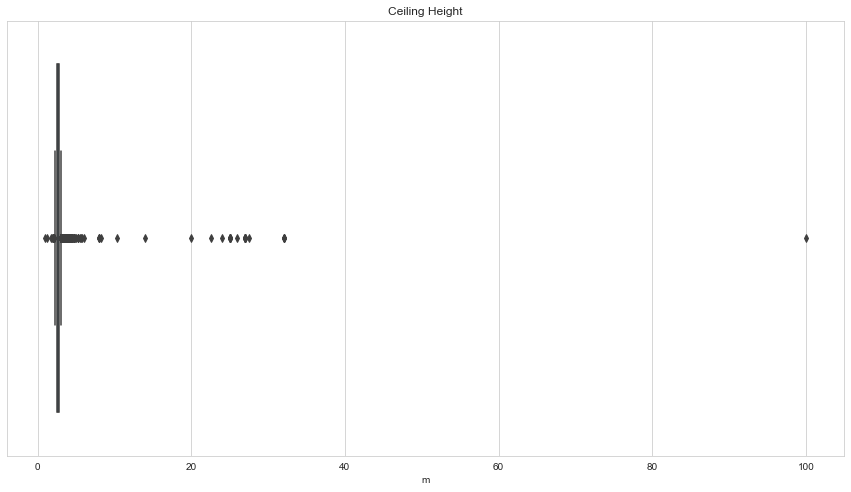

In [10]:
#
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
sns.boxplot(data=data, x='ceiling_height')
plt.title('Ceiling Height')
plt.xlabel('m')

pass

Oh this is not that we want to see).
Ok this data is from Saint Petersburg and based on data from Internet resources we can assume that the height of the ceilings should be from 2.2 to 4 meters

(2.0, 4.0)

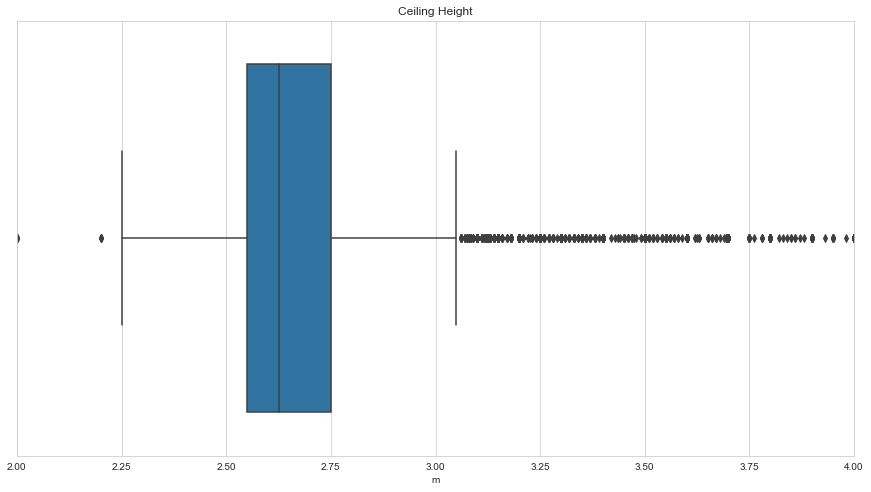

In [11]:
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
sns.boxplot(data=data, x='ceiling_height')
plt.title('Ceiling Height')
plt.xlabel('m')
plt.xlim(2,4)

Ok it's better but we see that 99% of values are in the range 2.25-3.05

In [12]:
# floors_total 
display(data['floors_total'].describe())
#display(data['floors_total'].value_counts())
data['floors_total'] = data['floors_total'].fillna('0') # replace NaN with 0
data['floors_total'] = data['floors_total'].astype('int') # change type


count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [13]:
data['floors_total'].isna().sum()

0

In [14]:
#living_area
living_area = data.loc[:,['living_area', 'rooms']]
display(living_area.corr()) # correlation between living_area and number of rooms

living_area.groupby(['rooms']).median() # median in the ratio of living space from the number of rooms
data['living_area'] = living_area.groupby('rooms')['living_area']\
                                .apply(lambda x: x.fillna(x.median())) # replace Nan witn median
display(data['living_area'].describe())
data['living_area'].isna().sum()


,living_area,rooms
living_area,1.000000,0.845977
rooms,0.845977,1.000000


count    23699.000000
mean        34.321982
std         21.700627
min          2.000000
25%         18.400000
50%         30.300000
75%         42.700000
max        409.700000
Name: living_area, dtype: float64

0

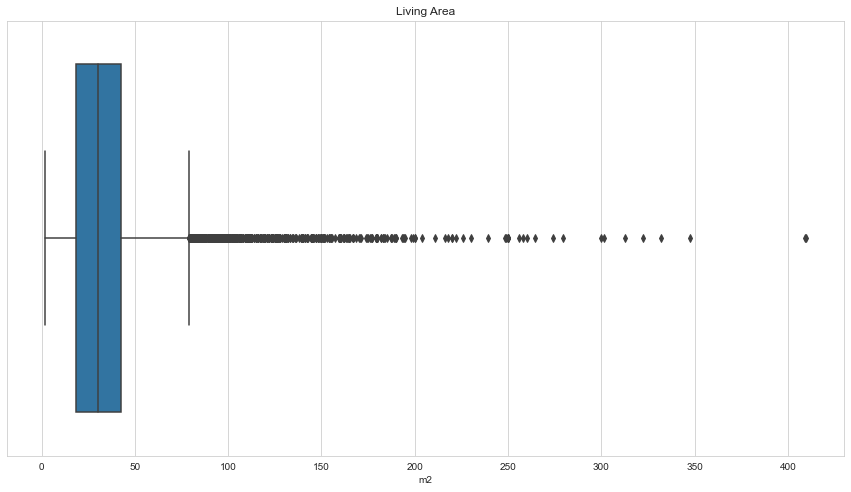

In [15]:
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
sns.boxplot(data=data, x='living_area')
plt.title('Living Area')
plt.xlabel('m2')

pass

In our analysis, too small and too large areas should not be taken into account. We should take values in range more than 2 and less than 75

In [16]:
# kitchen_area

display(data['kitchen_area'].describe())
kitchen_area = data.loc[:,['kitchen_area','total_area']]
display(kitchen_area.corr())
kitchen_area.groupby(['total_area']).median()
data['kitchen_area'] = kitchen_area.groupby('total_area')['kitchen_area']\
                                    .apply(lambda x: x.fillna(x.median()))


count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

,kitchen_area,total_area
kitchen_area,1.000000,0.609121
total_area,0.609121,1.000000


In [17]:
data['kitchen_area'].isna().sum()

205

In [18]:
# is_apartment

data['is_apartment'] = data['is_apartment'].fillna('1') # replace the missing values with 1 so that when converted to bool, the values true and false do not change places
data['is_apartment'] = data['is_apartment'].astype('bool') #converted column type to bool 
data['is_apartment'].isna().sum()


0

In [19]:
#balcony
data['balcony']= data['balcony'].fillna(0) # replace the missing values with 0, which means there is "no balcony"

data['balcony'] = data['balcony'].astype('int') # converted column type to int 
data['balcony'].isna().sum()

0

In [20]:
# locality_name
data['locality_name'].value_counts()
data['locality_name'].describe()

count               23650
unique                364
top       Санкт-Петербург
freq                15721
Name: locality_name, dtype: object

Missing about 9% of values:
- Perhaps this item was filled in automatically and possibly missing values ​​are due to the fact that the settlement was not found on the map (small, new, outside the region)
- Total 364 unique values
- Most common St. Petersburg 15721 times

In [21]:
# airports_nearest
display(data['airports_nearest'].describe())


count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

- The reasons for the passes are most likely due to the fact that in these settlements (where there are passes) there is no airport, and the nearest one is too far (sorry for the tautology)
- The minimum value is 0 (you need to check how many of these and what they are, this hardly means that the property is located right at the airport). Well, if you believe the data of Google search queries, then the distance from the center of St. Petersburg to the airport is 23 kilometers. Apparently there are apartments right next to the airport
- Maximum value 84869

In [22]:
# 'parks_around3000','parks_nearest','ponds_around3000','ponds_nearest'
data_distanse = data.loc[:,['parks_around3000','parks_nearest','ponds_around3000','ponds_nearest']]
display(data_distanse.describe())

,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
count,18181.000000,8079.000000,18181.000000,9110.000000
mean,0.611408,490.804555,0.770255,517.980900
std,0.802074,342.317995,0.938346,277.720643
min,0.000000,1.000000,0.000000,13.000000
25%,0.000000,288.000000,0.000000,294.000000
50%,0.000000,455.000000,1.000000,502.000000
75%,1.000000,612.000000,1.000000,729.000000
max,3.000000,3190.000000,3.000000,1344.000000


- Missing values indicate either that there are no parks and reservoirs nearby, or the system did not detect them (therefore, it will most likely be incorrect to replace the missing values ​​with 0)
- Judging by the data, the ponds are in parks

In [23]:
# Converting a column with dates
data['first_day_exposition']= pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# Add columns with year, month and day of the week

# DAY
data['daynumb_first_exposition'] = data['first_day_exposition'].dt.weekday

# create a dictionary to replace the numeric expression of the day with the name
days = ['понедельник', 'вторник', 'среда', 'четверг', 'пятница', 'суббота', 'воскресенье']
days_numb= [0,1,2,3,4,5,6,7]
day_dict = dict(zip(days_numb, days))

# replacing the numerical expression of the day with the name
data['daynumb_first_exposition'] = data['daynumb_first_exposition'].replace(day_dict) 

#MONTH
data['month_first_exposition'] = data['first_day_exposition'].dt.month
# create a dictionary to replace the numeric expression of the month with the name
month=['январь','февраль','март','апрель','май','июнь','июль','август','сентябрь','октябрь','ноябрь','декабрь']
month_numb = [1,2,3,4,5,6,7,8,9,10,11,12]
month_dict = dict(zip(month_numb, month))
data['month_first_exposition'] = data['month_first_exposition'].replace(month_dict)

# YEAR
data['yearnumb_first_exposition'] = data['first_day_exposition'].dt.year

In [24]:
# Create a column with floor values
# create a function
def floors_number(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    if floors_total-floor == 0:
        return 'поледний'
    return 'другой'
data['floors_number'] = data.apply(floors_number, axis=1)

In [25]:
# Add price per square meter
data['metr_cost'] = data['last_price'] / data['total_area']

In [26]:
data = data.query('ceiling_height >=2.25 and ceiling_height <=3.05')

In [27]:
data = data.query('living_area >2 and living_area <75')

In [28]:
data.shape

(21560, 27)

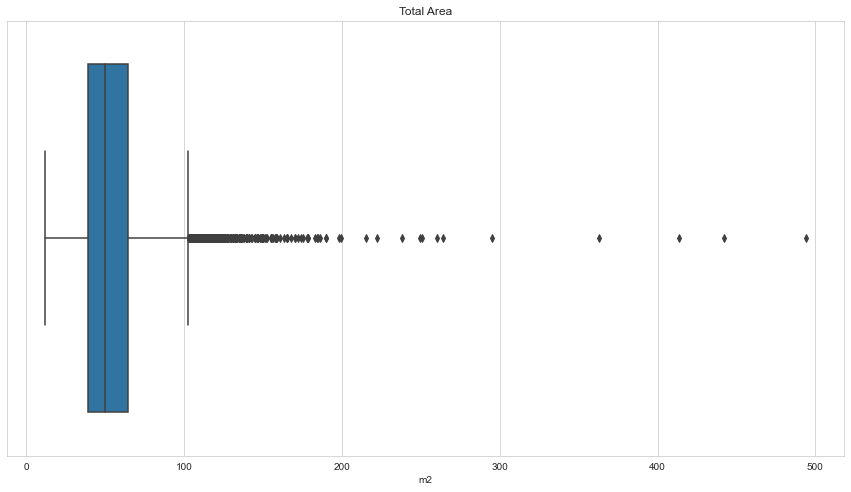

In [29]:
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
sns.boxplot(data=data, x='total_area')
plt.title('Total Area')
plt.xlabel('m2')

pass


In [30]:
data = data.query('total_area <110')

In [31]:
data.shape

(21163, 27)

In [32]:
# living area/total area ratio column
data['living_to_total'] = data['living_area'] / data['total_area']

# ratio column kitchen area / total area
data['kitchen_to_total'] = data['kitchen_area'] / data['total_area']

data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21163 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   total_images               21163 non-null  int64         
 1   last_price                 21163 non-null  float64       
 2   total_area                 21163 non-null  float64       
 3   first_day_exposition       21163 non-null  datetime64[ns]
 4   rooms                      21163 non-null  int64         
 5   ceiling_height             21163 non-null  float64       
 6   floors_total               21163 non-null  int32         
 7   living_area                21163 non-null  float64       
 8   floor                      21163 non-null  int64         
 9   is_apartment               21163 non-null  bool          
 10  studio                     21163 non-null  bool          
 11  open_plan                  21163 non-null  bool          
 12  kitc

In [33]:
display(data['last_price'].describe())
data['price_mln'] = data['last_price'] / 1000000 
display(data['price_mln'].describe())

count    2.116300e+04
mean     5.030839e+06
std      2.943308e+06
min      1.219000e+04
25%      3.300000e+06
50%      4.400000e+06
75%      5.990000e+06
max      5.000000e+07
Name: last_price, dtype: float64

count    21163.000000
mean         5.030839
std          2.943308
min          0.012190
25%          3.300000
50%          4.400000
75%          5.990000
max         50.000000
Name: price_mln, dtype: float64

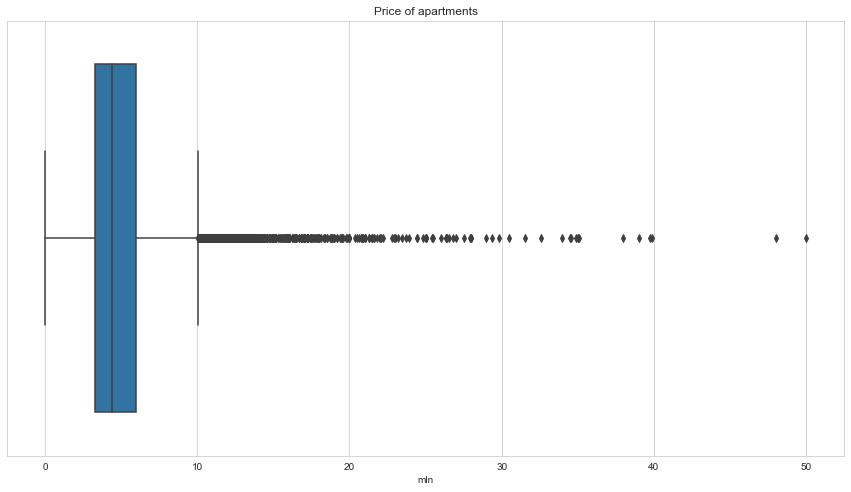

In [34]:
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
sns.boxplot(data=data, x='price_mln')
plt.title('Price of apartments')
plt.xlabel('mln')

pass


Ok what we see in Prices? That 99% of apartments are cheaper than 10 million. And we have apartments in price of 12000 that is strange and almost impossible look at it

In [35]:
data.query('price_mln < 0.013')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,daynumb_first_exposition,month_first_exposition,yearnumb_first_exposition,floors_number,metr_cost,living_to_total,kitchen_to_total,price_mln
8793,7,12190.0,109.0,2019-03-20,2,2.75,25,32.0,25,True,...,NaN,8.0,среда,март,2019,поледний,111.834862,0.293578,0.37156,0.01219


and now we see that it's a wrong

In [36]:
data.shape

(21163, 30)

In [37]:
data = data.query('price_mln > 0.012')

In [38]:
data.shape

(21163, 30)

Text(0, 0.5, 'count')

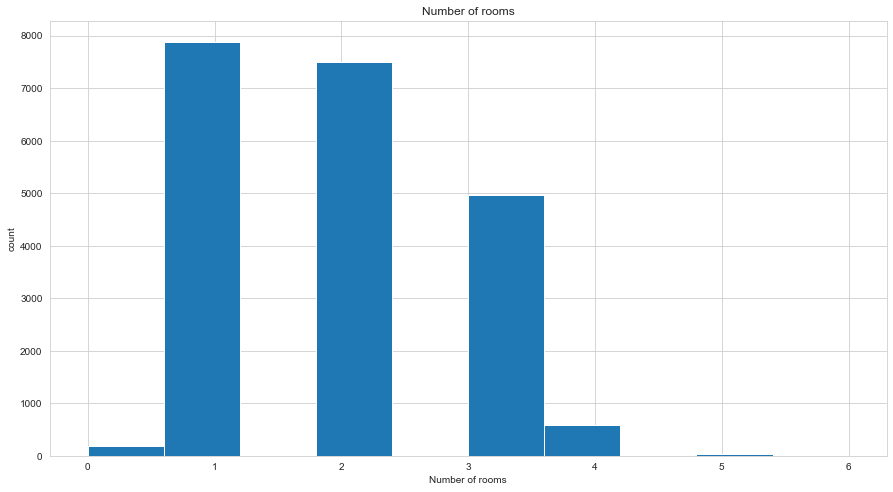

In [39]:
plt.figure(figsize=(15,8))
data.rooms.hist()
plt.title('Number of rooms')
plt.xlabel('Number of rooms')
plt.ylabel('count')

- Parsing by the number of rooms from 0 to 6.
- Most apartments with 1,2 and 3 rooms
- Under 0 it turns out that this is a studio apartment or an open plan
- 4 places and the rest are more common

In [40]:
display(data['days_exposition'].describe())


count    18563.00000
mean       171.65609
std        209.95791
min          1.00000
25%         43.50000
50%         91.00000
75%        216.50000
max       1580.00000
Name: days_exposition, dtype: float64

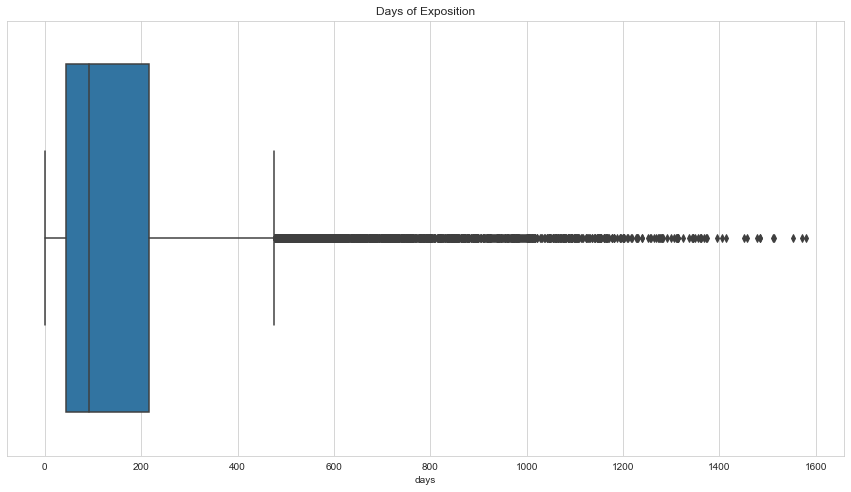

In [41]:
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
sns.boxplot(data=data, x='days_exposition')
plt.title('Days of Exposition')
plt.xlabel('days')

pass

- most often apartments are sold in the range from 45 to 220 days
- 1 day it's impossible because for one day you don't prepare documents or find a customer
- 99% values less than 500 days

In [42]:
data = data.query('days_exposition <= 360')

We can leave apartments that were sold a year or less. If the apartment has not been sold in a year, there may be some problems with it and it is better for the platform of the selling apartment to renew the contract with the seller in a year

,price_mln,total_area,rooms,cityCenters_nearest
price_mln,1.000000,0.684396,0.395271,-0.30512
total_area,0.684396,1.000000,0.791659,-0.11386
rooms,0.395271,0.791659,1.000000,-0.05674
cityCenters_nearest,-0.305120,-0.113860,-0.056740,1.00000


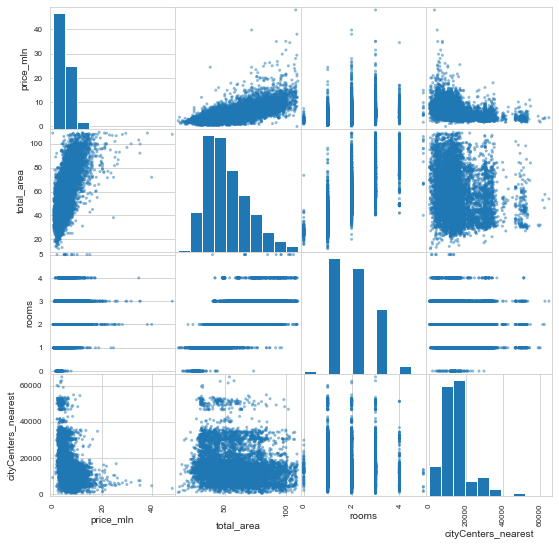

In [43]:
#Изучите, зависит ли цена от площади, числа комнат, удалённости от центра.

data_after_matrix=data.loc[:,['price_mln', 'total_area','rooms','cityCenters_nearest']]

pd.plotting.scatter_matrix(data_after_matrix, figsize=(9,9), grid=True)
data_after_matrix.corr()

- The price depends on the area of the apartment (the larger the area, the higher the price). Correlation 0.68 (average)
- There is no linear dependence of the price on the number of rooms, but it is clear that in categories with 2 and 3 rooms, prices reach higher values
- It can be seen that the farther from the center, the fewer apartments at a high price.

<AxesSubplot:xlabel='yearnumb_first_exposition'>

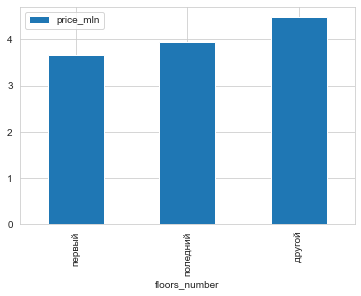

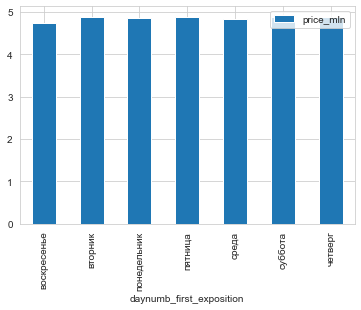

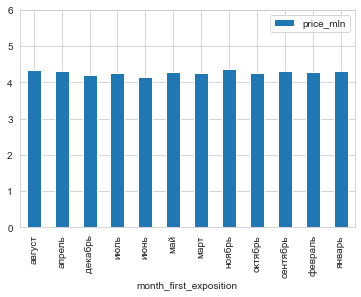

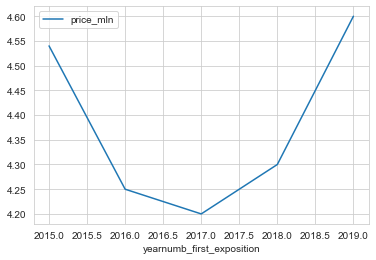

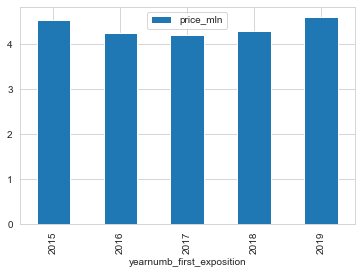

In [44]:
# The dependence of the cost on the floor

data.pivot_table(index='floors_number', values='price_mln', aggfunc = 'median').sort_values(by='price_mln').plot(kind='bar',grid=True)

data.pivot_table(index='daynumb_first_exposition', values='price_mln').plot(kind='bar',grid=True)
data.pivot_table(index='month_first_exposition', values='price_mln', aggfunc = 'median').plot(ylim=(0,6),kind='bar',grid=True)
data.pivot_table(index='yearnumb_first_exposition', values='price_mln', aggfunc = 'median').plot(grid=True)
data.pivot_table(index='yearnumb_first_exposition', values='price_mln', aggfunc = 'median').plot(kind='bar',grid=True)

1. By floors, the result is quite expected:
- cheapest first floor
- the last floor is more expensive than the first, but cheaper than other floors
2. Situation by day of the week:
- no clear relationship
3. By month:
- no clear relationship
4. What we have over the years:
- prices fell by 2016 and began to rise only after 2018
- in 2019 prices rose to the level of 2015
- most likely that the price here depends on the economic situation in the country

### Conclusions

- In this project, we have chosen the boundaries for the parameters when submitting an advertisement for the sale of apartments. Why is this needed? In order to filter out ads that are clearly untrue at the beginning (ceiling height 100 m or apartment area 2 meters, etc.)
- We analyzed the dependence of prices on various factors